# SAO/LIP Python Primer Course Exercise Set 10

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/exercises/Exercises10.ipynb)

In the exercises below, I suggest that you use an external text editor to create files for library creation. Feel free to use the supplied cells for code development, but you should use the Colab upload feature or your local machine to do these exercises.

## Exercise 1: Writing Your Own Integration Library

We've worked a bit with integration algorithms this week. Let's practice writing a module by implementing them in your own library.

**Your task:** Write a function that uses the trapezoidal rule to calculate the integral of a function over the range $[a, b]$. We've done this a couple times before in the exercises; you may copy your work from those exercises if you wish or write it from scratch using https://en.wikipedia.org/wiki/Trapezoidal_rule (remember that we defined $\Delta x = (b-a)/(N-1))$. Save this function to a file called `integration.py` in your current working directory. Use the cell below to test the function if necessary.

In [16]:
# here, you're meant to create your own files in either Colab or your local machine
# for the sake of the solutions, I've included the files in the solutions directory, which you can download here:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/solutions/archimedes.py
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/solutions/integration.py

--2023-06-13 02:50:26--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/solutions/archimedes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860 [text/plain]
Saving to: ‘archimedes.py’

archimedes.py       100%[===================>]     860  --.-KB/s    in 0s      

2023-06-13 02:50:26 (52.9 MB/s) - ‘archimedes.py’ saved [860/860]

--2023-06-13 02:50:27--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/solutions/integration.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 688 [text/

In [13]:
import numpy as np

def trapezoidal(a, b, n, f):
    grid = np.linspace(a, b, n) # grid with n points and bounds [a, b]
    dx = (b-a)/(n-1) # separation between points
    sum = f(a) + f(b) # placeholder containing endpoints
    for i in range(1, n-1): # iterate over all points except first and last
        sum += 2*f(grid[i]) # add each contribution
    return sum*dx/2 # multiply prefactor

# testing
f = lambda x: x**2
trapezoidal(0, 1, 100000, f)

0.33333333335000087

**Your task:** Write a function that uses the Monte-Carlo method to calculate the integral of a function over the range $[a, b]$. You may again copy the function from a previous exercise or write it from scratch if you wish. Save this function to `integration.py`, again using the cell below if necessary.

In [15]:
def montecarlo(a, b, n, f):
    grid = np.random.uniform(a, b, n) # random grid of n points in domain [a, b]
    V = b - a # 1D volume
    sum = 0 # placeholder for summation
    for i in grid:
        sum += f(i) # add contributions from each element
    return sum*V/n # multiply prefactor

# testing
f = lambda x: x**2
montecarlo(0, 1, 100000, f)

0.33389741155287456

Let's test the accuracy of these functions against `scipy.integrate.quad()`.

**Your task:** Use the trapezoidal rule, Monte-Carlo method, and `quad()` to evaluate the following integral:

\begin{equation}
\int_0^1 \frac{x^4(1-x)^4}{1+x^2}dx
\end{equation}

Import your functions from `integration`. Evaluate the trapezoidal and Monte-Carlo integrals with 200 values over the range $N=[10, 10^6]$ using `numpy.geomspace()`. Plot your results versus $N$ on a loglog scale. Also plot the `quad` result as a dashed horizontal line. Label everything accordingly. How do the three methods compare?

Text(0, 0.5, 'Integral value')

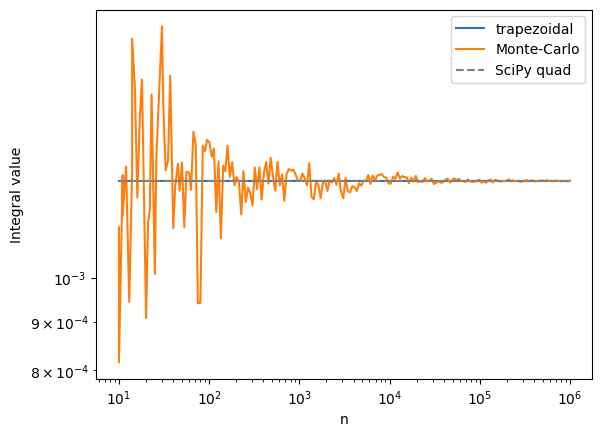

In [22]:
import integration as ig # our homebrewed module
from scipy import integrate
import matplotlib.pyplot as plt

def integrand(x):
    return x**4*(1-x)**4/(1+x**2)

# calculate values
n_vals = np.geomspace(10, 10**6, 200, dtype=np.int64) # n values (remember we need them to be ints)
trap_vals = [ig.trapezoidal(0, 1, i, integrand) for i in n_vals] # trapezoidal values
mc_vals = [ig.montecarlo(0, 1, i, integrand) for i in n_vals] # monte-carlo values
qval = integrate.quad(integrand, 0, 1)[0] # quad value

# plotting
plt.loglog(n_vals, trap_vals, label='trapezoidal')
plt.loglog(n_vals, mc_vals, label='Monte-Carlo')
plt.loglog(n_vals, [qval for i in n_vals], color = 'grey', linestyle='dashed', label='SciPy quad')
plt.legend()
plt.xlabel('n')
plt.ylabel('Integral value')

The exact value of the above integral is $22/7 - \pi$. (We can actually use this and the fact that the integrand is greater than zero to prove $22/7 > \pi$; if you're interested, see https://en.wikipedia.org/wiki/Proof_that_22/7_exceeds_%CF%80.)

**Your task:** Make another plot of the absolute errors of each method:

\begin{equation}
\bigg| E - (\frac{22}{7} - \pi) \bigg|
\end{equation}

Here, $E$ is a placeholder for your estimates. Plot the trapezoidal and Monte-Carlo errors on a loglog scale, along with a horizontal dashed line for the `quad` error. Which method seems to have the smallest error? How quickly does the error diminish for increasing $N$?

Text(0, 0.5, 'Absolute error')

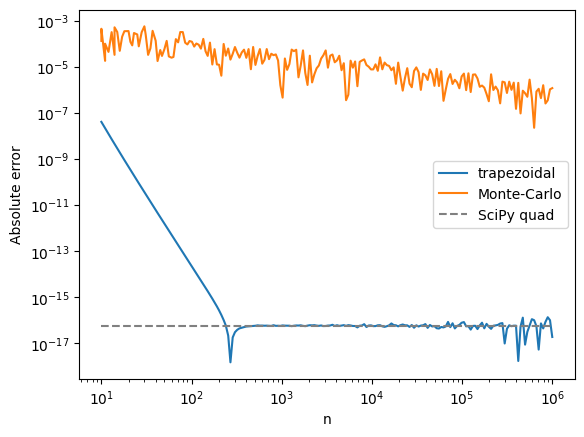

In [23]:
true_val = 22/7 - np.pi # the true value
trap_errs = [np.abs(i - true_val) for i in trap_vals] # trapezoidal errors
mc_errs = [np.abs(i - true_val) for i in mc_vals] # mc errors
qerr = np.abs(qval - true_val) # quad error

# plotting
plt.loglog(n_vals, trap_errs, label='trapezoidal')
plt.loglog(n_vals, mc_errs, label='Monte-Carlo')
plt.loglog(n_vals, [qerr for i in n_vals], color = 'grey', linestyle='dashed', label='SciPy quad')
plt.legend()
plt.xlabel('n')
plt.ylabel('Absolute error')

## Exercise 2: Archimedes' Method

One method of approximating $\pi$ is with *Archimedes' method*, which approximates the circumference of a circle to the perimeter of a circumscribed polygon. We know that the circumference of a unit circle is $2\pi r$ = $\pi$. As the number of sides in the circumscribed polygon increases, the polygon will become closer and closer to approximating the circle itself, and its perimeter will get closer to being the circle's circumference. We'll write some code to estimate the value of $\pi$ using this method.

To start, we need a way to generate the polygon itself. To do so, we can use the following formulas to generate a set of ordered pairs equally spaced along the circumference of the circle:

\begin{equation}
x_i = 0.5\cos(2\pi i/N) \\
y_i = 0.5\sin(2\pi i/N)
\end{equation}

(Notice that we're "cheating" by using $\pi$ to generate these; the original method of doing this would've involved using pencil and paper, which is far less efficient.)

**Your task:** Write a function that generates $N$ equally spaced points on the circumference of a unit circle. Test your code with a square; its vertices should be $(.5, 0)$, $(0, .5)$, $(-.5, 0)$, $(0, -.5)$. Save this to a file named `archimedes.py`.

In [10]:
import numpy as np

def vertices(n):
    pi = np.pi # define pi locally from numpy
    vertices = [] # placeholder list for vertices
    for i in range(n):
        xi = 0.5*np.cos(2*pi*i/n) # x coordinate
        yi = 0.5*np.sin(2*pi*i/n) # y coordinate
        vertices.append((xi, yi)) # populate list with vertex
    return vertices

# testing
vertices(4) # we may get some floating-point weirdness, but to machine precision it works as advertised

[(0.5, 0.0),
 (3.061616997868383e-17, 0.5),
 (-0.5, 6.123233995736766e-17),
 (-9.184850993605148e-17, -0.5)]

**Your task:** Let's check that this function works as advertised. Import your function from `archimedes` and generate three sets of 4, 8, and 16 points. Plot these points as blue circles along with a solid black unfilled unit circle centered at (Hint: see some examples using `plt.Circle` and `plt.add_artist` at https://www.geeksforgeeks.org/how-to-draw-a-circle-using-matplotlib-in-python/#).

Text(0.5, 1.0, 'Circumscribed Hexadecagon')

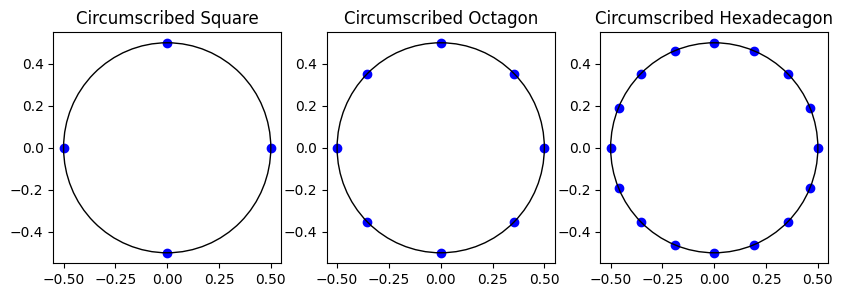

In [31]:
import archimedes as ar # our homebrewed library

# generate polygons with above function
poly4 = ar.vertices(4)
poly8 = ar.vertices(8)
poly16 = ar.vertices(16)

# plot each with a circle
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# plotting square
ax[0].scatter([i[0] for i in poly4], [i[1] for i in poly4], color='blue', marker='o') # the lists we're generating take the first and second elements of each tuple in poly4
circ = plt.Circle((0,0), 0.5, fill = False) # artist for circle centered at origin with radius 0.5
ax[0].add_artist(circ) # plot the circle
ax[0].set_title('Circumscribed Square')

# plotting octagon
ax[1].scatter([i[0] for i in poly8], [i[1] for i in poly8], color='blue', marker='o')
circ = plt.Circle((0,0), 0.5, fill = False) # artist for circle centered at origin with radius 0.5
ax[1].add_artist(circ) # plot the circle
ax[1].set_title('Circumscribed Octagon')

# plotting hexadecagon
ax[2].scatter([i[0] for i in poly16], [i[1] for i in poly16], color='blue', marker='o')
circ = plt.Circle((0,0), 0.5, fill = False) # artist for circle centered at origin with radius 0.5
ax[2].add_artist(circ) # plot the circle
ax[2].set_title('Circumscribed Hexadecagon')

We now have to calculate the perimeter of the circumscribed polygon. We'll do it recursively. We know that the distance of a straight-line path starting at $(x_0, y_0)$ and ending at $(x_1, y_1)$ is:

\begin{equation}
\sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2}
\end{equation}

We can repeat this same procedure for each pair of points sequentially until we reach $(x_{N-1}, y_{N-1})$, whose straight line path will end at $(x_0, y_0)$. By summing up each of these straight line paths, we will get the perimeter of the shape.

**Your task:** Write a function that takes in a series of ordered pairs $(x_i, y_i)$ and outputs the perimeter of the polygon traced out by straight-line paths connecting those points. Check that your function works by using a square with $N = 4$ points; its perimeter should be:

\begin{equation}
4\sqrt{0.5^2 + 0.5^2} = 2.8284271247461903
\end{equation}

Save this to `archimedes.py`.

In [12]:
def perimeter(points):
    n = len(points) # get num of points from the input list
    peri = 0 # placeholder for perimeter
    for i in range(n):
        x1 = points[i] # get the current point
        x0 = points[i-1] # get the previous point; if i=0, this is the last point
        xdiff = x1[0] - x0[0] # difference in x coords
        ydiff = x1[1] - x0[1] # difference in y coords
        edge = np.sqrt(xdiff**2 + ydiff**2) # calculate edge length
        peri += edge # add the edge to the perimeter
    return peri

# testing
verts = vertices(4)
perimeter(verts)

2.82842712474619

**Your task:** Finally, we'll use these two functions to approximate $\pi$. Use `archimedes` to calculate the perimeters of 200 $N$-sided circumscribed polygons, with $N = [4, 4^8]$. Plot these perimeters versus $N$ on a loglog plot along with a dashed horizontal line at $y=\pi$. How does the estimate compare? How quickly does it converge to $\pi$?

Text(0, 0.5, 'Perimeter')

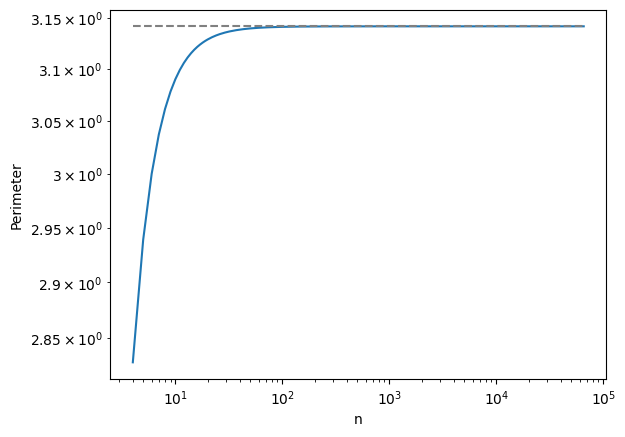

In [36]:
import archimedes as ar # it's best to re-import after making modifications

n_vals = np.geomspace(4, 4**8, 200, dtype=np.int64) # 200 integers between 4 and 4**8
peris = [] # placeholder list
for i in n_vals:
    pts = ar.vertices(i) # generate n points along circumference
    peri = ar.perimeter(pts) # find perimeter of shape bounded by pts
    peris.append(peri) # add to the list

# plotting
plt.loglog(n_vals, peris) # plot perimeter vs n
plt.loglog(n_vals, [np.pi for i in n_vals], linestyle='dashed', color='grey') # true value
plt.xlabel('n')
plt.ylabel('Perimeter')